In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\rajat.chauhan\Downloads\Data science\Waste Water Treatment Plant\data\processed\processed.csv")
df

,Temp_C,pH,TSS_in_mg_l,BOD_in_mg_l,COD_in_mg_l,TSS_out_mg_l,BOD_out_mg_l,COD_out_mg_l,DO_out_mg_l
0,24,8.75,219,145,268,9,5,48,5.1
1,26,8.64,237,190,220,13,9,32,5.0
2,25,8.73,227,140,288,11,6,44,5.3
3,26,8.77,227,215,228,10,10,28,5.2
4,27,8.60,290,165,244,12,9,36,5.4
...,...,...,...,...,...,...,...,...,...
335,19,7.21,292,130,292,26,24,56,4.9
336,20,7.09,282,175,240,29,29,44,4.7
337,20,7.20,272,140,288,27,22,32,5.0
338,24,7.08,266,170,252,25,29,56,5.0


In [3]:
X = df.drop(columns="TSS_out_mg_l")
X

,Temp_C,pH,TSS_in_mg_l,BOD_in_mg_l,COD_in_mg_l,BOD_out_mg_l,COD_out_mg_l,DO_out_mg_l
0,24,8.75,219,145,268,5,48,5.1
1,26,8.64,237,190,220,9,32,5.0
2,25,8.73,227,140,288,6,44,5.3
3,26,8.77,227,215,228,10,28,5.2
4,27,8.60,290,165,244,9,36,5.4
...,...,...,...,...,...,...,...,...
335,19,7.21,292,130,292,24,56,4.9
336,20,7.09,282,175,240,29,44,4.7
337,20,7.20,272,140,288,22,32,5.0
338,24,7.08,266,170,252,29,56,5.0


In [4]:
X.describe()

,Temp_C,pH,TSS_in_mg_l,BOD_in_mg_l,COD_in_mg_l,BOD_out_mg_l,COD_out_mg_l,DO_out_mg_l
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,20.194118,7.963794,254.676471,158.426471,266.035294,16.917647,43.905882,5.032941
std,6.844499,0.379292,30.400785,22.773423,30.183684,7.167547,10.522204,0.234685
min,8.000000,7.060000,170.000000,100.000000,200.000000,5.000000,24.000000,4.500000
25%,13.000000,7.742500,232.000000,140.000000,244.000000,10.000000,36.000000,4.900000
50%,24.000000,8.040000,257.000000,160.000000,270.000000,18.500000,44.000000,5.000000
75%,26.000000,8.142500,281.250000,175.000000,292.000000,23.000000,52.000000,5.200000
max,29.000000,8.810000,312.000000,215.000000,312.000000,29.000000,72.000000,5.600000


The column having the highest variance is the most important one but these all are of different scales so we cannot compare them directly, firstly let us do min max scaling on it

When columns are on different scales, comparing variance directly can be misleading, as the magnitude of the variance depends on the scale of the data. To address this issue, it's better to standardize or normalize the columns before calculating variance. This way, you can make the columns comparable by removing the effect of scale.

In [7]:
df = X

In [8]:
import pandas as pd


# Apply Min-Max scaling: (value - min) / (max - min)
min_max_scaled_df = (df - df.min()) / (df.max() - df.min())

# Calculate variance for each Min-Max scaled column
variance = min_max_scaled_df.var()

# Sort the variance in descending order
sorted_variance = variance.sort_values(ascending=False)

print(sorted_variance)


Temp_C          0.106229
BOD_out_mg_l    0.089191
COD_in_mg_l     0.072629
COD_out_mg_l    0.048054
pH              0.046976
TSS_in_mg_l     0.045835
DO_out_mg_l     0.045518
BOD_in_mg_l     0.039216
dtype: float64


We will notice, how Temp_C and BOD_out_mg_l having the most variance would be the most useful columns selected by the feature selection techniques as well.

In [72]:
y = df["TSS_out_mg_l"]
y

0       9
1      13
2      11
3      10
4      12
       ..
335    26
336    29
337    27
338    25
339    29
Name: TSS_out_mg_l, Length: 340, dtype: int64

In [73]:
from sklearn.model_selection import train_test_split

# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


1. Correlation Matrix with Heatmap
This helps identify highly correlated features, which can be removed to avoid redundancy.

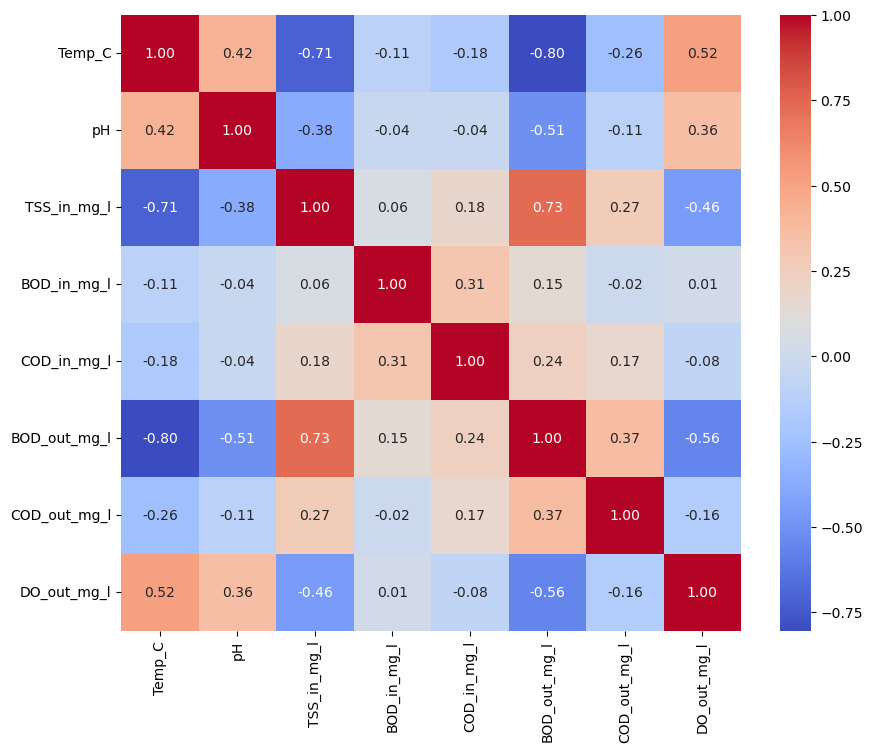

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate the correlation matrix
corr_matrix = X_train.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


If two features have a high correlation (e.g., > 0.8), you can remove one of them as they provide similar information.


BOD_out_mg_i has high linear correlation with Temp_C

2. Univariate Feature Selection (Chi-Square / ANOVA F-Test)
You can use statistical tests to rank features. For regression problems, the f_regression method is suitable.

In [75]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Initialize SelectKBest with f_regression
k_best = SelectKBest(score_func=f_regression, k=10)  # Choose k=10 or another value
X_train_new = k_best.fit_transform(X_train, y_train)

# Get selected feature indices
selected_indices = k_best.get_support(indices=True)

# Get selected feature names
selected_feature_names = X_train.columns[selected_indices]
print("Selected features:", selected_feature_names.tolist())

# Now you can use the selected features to transform your test data
X_test_new = k_best.transform(X_test)

# Optionally, you can continue with training a model using the selected features
model = RandomForestRegressor()
model.fit(X_train_new, y_train)

# Make predictions
y_train_pred = model.predict(X_train_new)
y_test_pred = model.predict(X_test_new)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Mean Squared Error on Training Data:", train_mse)
print("Mean Squared Error on Test Data:", test_mse)
print("R² Score on Training Data:", train_r2)
print("R² Score on Test Data:", test_r2)


Selected features: ['Temp_C', 'pH', 'TSS_in_mg_l', 'BOD_in_mg_l', 'COD_in_mg_l', 'BOD_out_mg_l', 'COD_out_mg_l', 'DO_out_mg_l']
Mean Squared Error on Training Data: 1.398583455882353
Mean Squared Error on Test Data: 7.402222058823531
R² Score on Training Data: 0.9655731355946583
R² Score on Test Data: 0.8286644467915764


c:\Users\rajat.chauhan\.conda\envs\env1\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=8. All the features will be returned.
  warnings.warn(


3. Recursive Feature Elimination (RFE)
RFE recursively removes the least important features based on a chosen estimator until the specified number of features is reached.

In [76]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Initialize the model
model = RandomForestRegressor()

# Initialize Recursive Feature Elimination (RFE)
rfe = RFE(estimator=model, n_features_to_select=5)  # Select 10 best features
rfe = rfe.fit(X_train, y_train)

# Get rankings of features
print("Feature rankings:", rfe.ranking_)

# Get the mask of selected features
selected_mask = rfe.support_

# Get selected feature names
selected_feature_names = X_train.columns[selected_mask]
print("Selected features:", selected_feature_names.tolist())

# Transform the data using the selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Re-train the model with the selected features
model.fit(X_train_rfe, y_train)

# Make predictions on both training and test sets
y_train_pred = model.predict(X_train_rfe)
y_test_pred = model.predict(X_test_rfe)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Mean Squared Error on Training Data:", train_mse)
print("Mean Squared Error on Test Data:", test_mse)
print("R² Score on Training Data:", train_r2)
print("R² Score on Test Data:", test_r2)


Feature rankings: [1 1 1 2 3 1 4 1]
Selected features: ['Temp_C', 'pH', 'TSS_in_mg_l', 'BOD_out_mg_l', 'DO_out_mg_l']
Mean Squared Error on Training Data: 1.3981345588235294
Mean Squared Error on Test Data: 7.3070264705882355
R² Score on Training Data: 0.9655841854309131
R² Score on Test Data: 0.8308678917360377


4. Feature Importance from Tree-Based Models
Tree-based algorithms like Random Forests can provide feature importance scores, which help select the most impactful features.

In [77]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the RandomForestRegressor model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Get feature importances
feature_importance = model.feature_importances_

# Sort features by importance
sorted_idx = np.argsort(feature_importance)[::-1]
important_features = pd.DataFrame({
    'Feature': X_train.columns[sorted_idx],
    'Importance': feature_importance[sorted_idx]
})

print("Feature Importances:")
print(important_features)

# Optionally, you can re-train and evaluate the model using the top features if desired
# For example, selecting top 10 features
top_n = 5
top_features = important_features.head(top_n)['Feature']
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

model.fit(X_train_top, y_train)

# Make predictions
y_train_pred = model.predict(X_train_top)
y_test_pred = model.predict(X_test_top)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Mean Squared Error on Training Data:", train_mse)
print("Mean Squared Error on Test Data:", test_mse)
print("R² Score on Training Data:", train_r2)
print("R² Score on Test Data:", test_r2)


Feature Importances:
        Feature  Importance
0        Temp_C    0.515083
1  BOD_out_mg_l    0.289351
2   TSS_in_mg_l    0.050901
3            pH    0.037831
4   DO_out_mg_l    0.037542
5   BOD_in_mg_l    0.030410
6   COD_in_mg_l    0.020043
7  COD_out_mg_l    0.018839
Mean Squared Error on Training Data: 1.356262132352941
Mean Squared Error on Test Data: 7.135554411764705
R² Score on Training Data: 0.9666148971430834
R² Score on Test Data: 0.8348368702163977


5. L1 Regularization (Lasso)
Lasso (L1 regularization) can force some feature weights to zero, effectively performing feature selection.

In [78]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and fit the Lasso model
lasso = Lasso(alpha=0.01)  # Adjust alpha to control regularization strength
lasso.fit(X_train, y_train)

# Select important features using SelectFromModel
model = SelectFromModel(lasso, prefit=True)
X_lasso = model.transform(X_train)

# Get the mask of selected features
selected_mask = model.get_support()

# Get selected feature names
selected_feature_names = X_train.columns[selected_mask]
print("Selected features:", selected_feature_names.tolist())

# Optionally, you can re-train and evaluate the model using the selected features if desired
X_test_lasso = model.transform(X_test)

# Re-train the Lasso model with the selected features
lasso.fit(X_lasso, y_train)

# Make predictions
y_train_pred = lasso.predict(X_lasso)
y_test_pred = lasso.predict(X_test_lasso)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Mean Squared Error on Training Data:", train_mse)
print("Mean Squared Error on Test Data:", test_mse)
print("R² Score on Training Data:", train_r2)
print("R² Score on Test Data:", test_r2)



Selected features: ['Temp_C', 'pH', 'TSS_in_mg_l', 'BOD_in_mg_l', 'COD_in_mg_l', 'BOD_out_mg_l', 'COD_out_mg_l', 'DO_out_mg_l']
Mean Squared Error on Training Data: 9.085368759746128
Mean Squared Error on Test Data: 8.502025223354014
R² Score on Training Data: 0.7763588886678366
R² Score on Test Data: 0.8032078498241038


c:\Users\rajat.chauhan\.conda\envs\env1\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\rajat.chauhan\.conda\envs\env1\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


6. Principal Component Analysis (PCA)
PCA is a dimensionality reduction technique that transforms the features into a set of orthogonal components, though it does not maintain interpretability.

In [79]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and fit PCA
pca = PCA(n_components=5)  # Keep 10 principal components
X_pca = pca.fit_transform(X_train)

# Print explained variance ratio for each principal component
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Optional: Transform test data using the same PCA model
X_test_pca = pca.transform(X_test)

# Optionally, re-train and evaluate a model using the PCA-transformed data
model = RandomForestRegressor()
model.fit(X_pca, y_train)

# Make predictions
y_train_pred = model.predict(X_pca)
y_test_pred = model.predict(X_test_pca)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Mean Squared Error on Training Data:", train_mse)
print("Mean Squared Error on Test Data:", test_mse)
print("R² Score on Training Data:", train_r2)
print("R² Score on Test Data:", test_r2)

Explained variance ratio: [0.46355157 0.320924   0.15813282 0.0405338  0.01312166]
Mean Squared Error on Training Data: 1.620416544117647
Mean Squared Error on Test Data: 9.404429411764706
R² Score on Training Data: 0.9601125979219339
R² Score on Test Data: 0.7823203487993753
